### LSTM (Long Short-Term Memory Networks)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [3]:
sales = pd.read_csv('dataset/sales_dataset.csv', parse_dates=True, index_col=0)

In [4]:
target = np.array(sales.Sales)

In [5]:
train_target = target[:-9].reshape(-1,1)
test_target = target[-9:].reshape(-1,1)

In [6]:
scaler = StandardScaler()
scaler.fit(train_target)
scaledTrainData = scaler.transform(train_target)
scaledTestData = scaler.transform(test_target)

In [7]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs).reshape(-1,time_steps,1), np.array(ys)

In [8]:
time_steps=10
X_train, y_train = create_dataset(scaledTrainData, scaledTrainData, time_steps)

In [9]:
X_train.shape, y_train.shape

((86, 10, 1), (86, 1))

In [10]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=70,
  return_sequences=True,  
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.LSTM(units=70, return_sequences=True))
model.add(keras.layers.LSTM(units=70, return_sequences=True))
model.add(keras.layers.LSTM(units=70))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 77 samples, validate on 9 samples
Epoch 1/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0153 - val_loss: 0.1876
Epoch 2/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0149 - val_loss: 0.2038
Epoch 3/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0149 - val_loss: 0.1935
Epoch 4/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0145 - val_loss: 0.2088
Epoch 5/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0149 - val_loss: 0.1929
Epoch 6/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0142 - val_loss: 0.2149
Epoch 7/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0151 - val_loss: 0.1880
Epoch 8/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0142 - val_loss: 0.2199
Epoch 9/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0154 - val_loss: 0.1833
Epoch 10/250
77/77 [============================

Epoch 81/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0071 - val_loss: 0.3785
Epoch 82/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0069 - val_loss: 0.3906
Epoch 83/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0069 - val_loss: 0.3897
Epoch 84/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0068 - val_loss: 0.4119
Epoch 85/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0069 - val_loss: 0.3883
Epoch 86/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0075 - val_loss: 0.4431
Epoch 87/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0096 - val_loss: 0.3385
Epoch 88/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0154 - val_loss: 0.4005
Epoch 89/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0170 - val_loss: 0.2863
Epoch 90/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0199

77/77 [==============================] - 0s 1ms/sample - loss: 0.0102 - val_loss: 0.3083
Epoch 161/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0095 - val_loss: 0.2429
Epoch 162/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0074 - val_loss: 0.3544
Epoch 163/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0092 - val_loss: 0.2842
Epoch 164/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0093 - val_loss: 0.3136
Epoch 165/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0132 - val_loss: 0.2641
Epoch 166/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0147 - val_loss: 0.3336
Epoch 167/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0143 - val_loss: 0.3394
Epoch 168/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0148 - val_loss: 0.3488
Epoch 169/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0192 - v

77/77 [==============================] - 0s 1ms/sample - loss: 0.0090 - val_loss: 0.1552
Epoch 240/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0070 - val_loss: 0.1467
Epoch 241/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0053 - val_loss: 0.1494
Epoch 242/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0042 - val_loss: 0.1731
Epoch 243/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0039 - val_loss: 0.1706
Epoch 244/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0032 - val_loss: 0.1618
Epoch 245/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0029 - val_loss: 0.1695
Epoch 246/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0026 - val_loss: 0.1769
Epoch 247/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0024 - val_loss: 0.1825
Epoch 248/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0022 - v

In [19]:
ypred = []
for i in range(len(scaledTestData)):
    if i == 0:
        ypred.append(model.predict(scaledTrainData[-10:].reshape(1,time_steps,1)))        
    else:
        prev_predictions = [x[0][0] for x in ypred]
        ypred.append(model.predict(np.concatenate((scaledTrainData[-10+i:].reshape(-1),prev_predictions)) \
                                   .reshape(1,time_steps,1)))  

In [20]:
ypred

[array([[-0.7331423]], dtype=float32),
 array([[-0.24722612]], dtype=float32),
 array([[-0.01627074]], dtype=float32),
 array([[0.16173077]], dtype=float32),
 array([[0.09084288]], dtype=float32),
 array([[-0.03786566]], dtype=float32),
 array([[-0.43703526]], dtype=float32),
 array([[-1.1611502]], dtype=float32),
 array([[0.15172382]], dtype=float32)]

In [21]:
ypred = [x[0][0] for x in ypred]

In [22]:
ypred

[-0.7331423,
 -0.24722612,
 -0.016270744,
 0.16173077,
 0.09084288,
 -0.03786566,
 -0.43703526,
 -1.1611502,
 0.15172382]

In [23]:
predictions = np.round(scaler.inverse_transform(ypred))
predictions

array([2876., 4154., 4761., 5229., 5042., 4704., 3655., 1751., 5202.],
      dtype=float32)

In [24]:
np.sqrt(mean_squared_error(test_target,predictions))

689.281348781307

In [25]:
print('R2 score for LSTM when root mean squared error is minimized is %.2f' %r2_score(test_target, predictions))

R2 score for LSTM when root mean squared error is minimized is 0.67


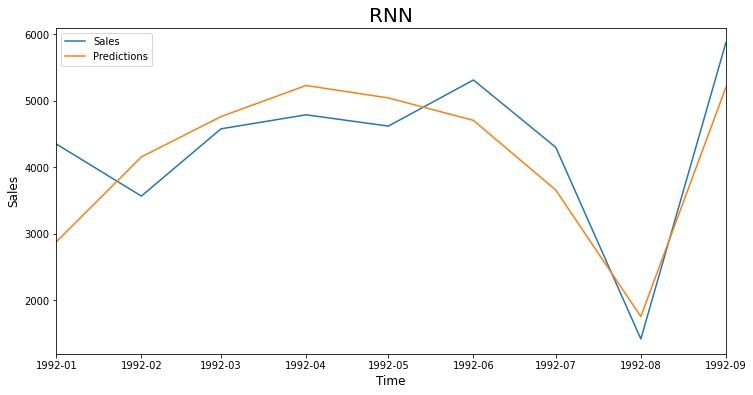

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(sales.index[-9:], sales.Sales[-9:], label='Sales');
ax.plot(sales.index[-9:], predictions, label='Predictions');

ax.set_xlim(sales.index[-9], sales.index[-1])

ax.set_ylabel('Sales', fontsize=12)
ax.set_xlabel('Time', fontsize=12)
ax.set_title('RNN', fontsize=20)
plt.legend(loc='upper left')
plt.show()

### Conclusion and Results

The predictions are done by taking 10 time steps. For the prediciton of sales at 1992-01, the last 10 time steps from the training set are taken. For the prediction of sales at 1992-02, the last 9 time steps from the training set and the last prediction (prediction at 1992-01) are taken. For the prediction of sales at 1992-03, the last 8 time steps from the training set and the last 2 predicitions (predictions at 1992-01 and 1992-02) are taken. This continues untill all the predictions for sales are made for the last months.    

The neural network topology designed using LSTM layers results in higher RMSE for the last 9 months compared to exponential smoothing, random forests and SARIMA. However, ridge regression is the model with the highest RMSE. 

This network can be fiddled with to try to decrease RMSE. Some of the options can be adding more layers, increasing the # of neurons in each layer, adding dropout layers, adding regularization, changing the learning rate and so on. The possible path for following can be decided after figuring out if overfitting or underfitting is the problem. When validation loss is compared with training loss, it seems that overfitting is the problem.

Since the RNN results are not as good as exponential smoothing results in terms of RMSE measured on the last 9 months, the results are not saved to a csv file. There is not too much training data for deep learning to work well. Deep learning can be a good option when there is abundant data to train on.  